In [1]:
import numpy as np
import cv2
import os 
import random
import matplotlib.pyplot as plt
import pickle
import random 
random.seed(43)

In [8]:
test_size = 0.2
train_path = 'train_set'
test_path = 'test_set'

In [9]:
import shutil

for category in CATEGORIES:

   

    dataset_categories = os.path.join(DIRECTORY, category)
    list_n = len(os.listdir(dataset_categories))
    current_dir = os.listdir(dataset_categories)
    random.shuffle(current_dir)

    for idx, img in enumerate(current_dir):

        if idx+1 < list_n * test_size:
            newpath =  os.path.join(DIRECTORY, test_path, category)
            if not os.path.exists(newpath):
                os.makedirs(newpath)

            oldpath = os.path.join(dataset_categories, img)
            shutil.copy(oldpath, os.path.join(newpath, img))
        else:
            newpath =  os.path.join(DIRECTORY, train_path, category)
            if not os.path.exists(newpath):
                os.makedirs(newpath)

            oldpath = os.path.join(dataset_categories, img)
            shutil.copy(oldpath, os.path.join(newpath, img))       


                


In [10]:
sets = [train_path, test_path]

for set in sets:
    print(set)
    dataset = os.path.join(DIRECTORY, set)
    fake = os.path.join(DIRECTORY, set, 'fake')
    real = os.path.join(DIRECTORY, set, 'real')
    for idx, img in enumerate(os.listdir(fake)):
        if idx+1 > len(os.listdir(real)):
             os.remove(os.path.join(fake, img))




train_set
test_set


In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5bYnMS3fGPNuZIqAEx62")
project = rf.workspace("carlo-almeda").project("fake-news-image-detector-32udr")
dataset = project.version(1).download("folder")

  Using cached roboflow-1.0.9-py3-none-any.whl (56 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached wget-3.2-py3-none-any.whl
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.4
    Uninstalling pyparsing-3.0.4:
      Successfully uninstalled pyparsing-3.0.4
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Uninstalling certifi-2021.10.8:
      Successfully uninstalled certifi-2021.10.8
  Attempting un

Extracting Dataset Version Zip to Fake-News-Image-Detector-1 in folder:: 100%|██████████| 3088/3088 [00:02<00:00, 1263.35it/s]


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'news images/train_set'
validation_dir = 'news images/test_set'
batch_size = 24
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(250, 250), batch_size=batch_size, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(250, 250), batch_size=batch_size, class_mode='binary')

Found 706 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [5]:
import os
import cv2
DIRECTORY = "Fake-News-Image-Detector-1"
CATEGORIES = ["fake", "real"]

In [6]:
IMG_SIZE = 250
sets = ['train', 'test', 'valid']
train_set = []
test_set = []
valid_set = []

for category in CATEGORIES:
    for set in sets:
        datasets = os.path.join(DIRECTORY, set, category)
        label = CATEGORIES.index(category)
        for img in os.listdir(datasets):
            img_path = os.path.join(datasets, img)
            img_arr = cv2.imread(img_path)
            #img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            img_arr = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
            if set == 'train':
                train_set.append([img_arr, label])
            if set == 'test':
                test_set.append([img_arr, label])
            if set == 'valid':
                valid_set.append([img_arr, label])

In [7]:
import numpy as np

In [8]:
X_train = np.array([arr[0] for arr in train_set])/255
y_train = np.array([arr[1] for arr in train_set])

X_test = np.array([arr[0] for arr in test_set])/255
y_test = np.array([arr[1] for arr in test_set])

X_valid = np.array([arr[0] for arr in valid_set])/255
y_valid = np.array([arr[1] for arr in valid_set])

In [9]:
# X_train = []
# y_train = []

# for features, labels in train_set:
#     X_train.append(np.array(features)/255)
#     y_train.append(np.array(labels)/255)


# X_test = []
# y_test = []

# for features, labels in test_set:
#     X_test.append(np.array(features)/255)
#     y_test.append(np.array(labels)/255)


# X_valid = []
# y_valid = []

# for features, labels in valid_set:
#     X_valid.append(np.array(features)/255)
#     y_valid.append(np.array(labels)/255)



In [10]:
X_train.shape

(2691, 250, 250, 3)

In [11]:
from keras import layers
from keras import models
from tensorflow import keras
from keras import optimizers
 
keras.backend.clear_session()

In [12]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dropout (Dropout)           (None, 238144)            0

In [13]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_valid, y_valid),
                    batch_size=32)

Epoch 1/50
85/85 [==============================] - 17s 147ms/step - loss: 2.4774 - acc: 0.6834 - val_loss: 0.6241 - val_acc: 0.6809
Epoch 2/50
85/85 [==============================] - 12s 140ms/step - loss: 0.4596 - acc: 0.8432 - val_loss: 1.3192 - val_acc: 0.7121
Epoch 3/50
85/85 [==============================] - 13s 150ms/step - loss: 0.2443 - acc: 0.9190 - val_loss: 0.2242 - val_acc: 0.9105
Epoch 4/50
85/85 [==============================] - 12s 138ms/step - loss: 0.1470 - acc: 0.9614 - val_loss: 0.2668 - val_acc: 0.8949
Epoch 5/50
85/85 [==============================] - 11s 131ms/step - loss: 0.1184 - acc: 0.9762 - val_loss: 0.2814 - val_acc: 0.9183
Epoch 6/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0772 - acc: 0.9844 - val_loss: 0.3737 - val_acc: 0.9027
Epoch 7/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0554 - acc: 0.9848 - val_loss: 0.3945 - val_acc: 0.9183
Epoch 8/50
85/85 [==============================] - 29s 338ms/step - 

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 20ms/step - loss: 2.5208 - acc: 0.9070


[2.5208005905151367, 0.9069767594337463]

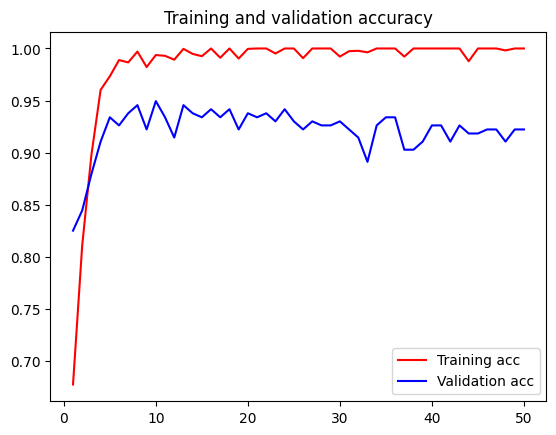

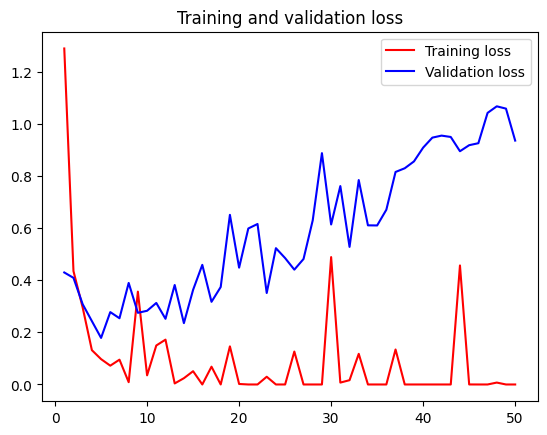

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
model_json = model.to_json()
with open("classification models/CNN/CNN_Skin_Classifier.json", "w") as json_file:
    json_file.write(model_json)

model.save("classification models/CNN/CNN_Skin_Classifier_model.h5")
print("Saved model to disk")
model.save_weights("classification models/CNN/CNN_Skin_weights.h5")

Saved model to disk


In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]